# Garment Round Neck

## Anthropometric Measurement: Neck Size

Mean Squared Error:  69.92507603777118
     anthropometric_measurement  actual_tolerance  predicted_tolerance
68                         48.5              18.5            14.132634
147                        47.6              24.4            14.799999
96                         47.0              18.0            17.333326
82                         46.0              27.6            17.333333
135                        46.3              40.6            20.866666
139                        45.5              25.5            17.209842
26                         51.0              29.0            18.666667
12                         42.0              22.0            25.266667
18                         46.0              20.0            17.333333
15                         47.0              28.0            17.333326
134                        47.0              25.0            17.333326
128                        45.2              22.6            16.533333
108                        45.6       

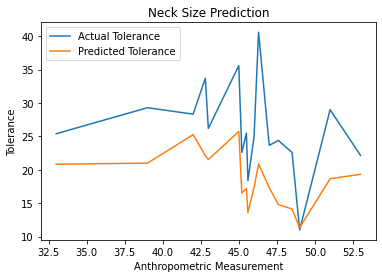

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("necksize.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.1 # learning rate
gamma = 0.5 # discount factor
epsilon = 0.9 # exploration rate
num_iterations = 40000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Neck Size Prediction')
plt.legend()
plt.show()

Mean Squared Error:  26.335939749400197
     anthropometric_measurement  actual_tolerance  predicted_tolerance
68                         48.5              18.5            19.272727
147                        47.6              24.4            20.181818
96                         47.0              18.0            23.636364
82                         46.0              27.6            23.636364
135                        46.3              40.6            28.454545
139                        45.5              25.5            18.636364
26                         51.0              29.0            25.454545
12                         42.0              22.0            30.000000
18                         46.0              20.0            23.636364
15                         47.0              28.0            23.636364
134                        47.0              25.0            23.636364
128                        45.2              22.6            21.636364
108                        45.6      

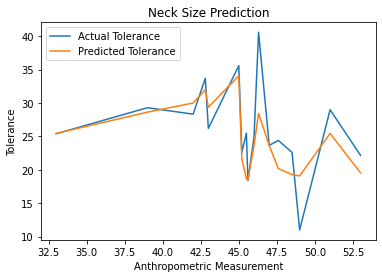

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("necksize.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon = 0.1 # exploration rate
num_iterations = 100000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Neck Size Prediction')
plt.legend()
plt.show()

Mean Squared Error:  64.74420421221015
     anthropometric_measurement  actual_tolerance  predicted_tolerance
68                         48.5              18.5            16.818182
147                        47.6              24.4            20.545455
96                         47.0              18.0            21.363636
82                         46.0              27.6            20.727273
135                        46.3              40.6            28.454545
139                        45.5              25.5            18.636364
26                         51.0              29.0            25.454545
12                         42.0              22.0            21.818182
18                         46.0              20.0            20.727273
15                         47.0              28.0            21.363636
134                        47.0              25.0            21.363636
128                        45.2              22.6            18.909091
108                        45.6       

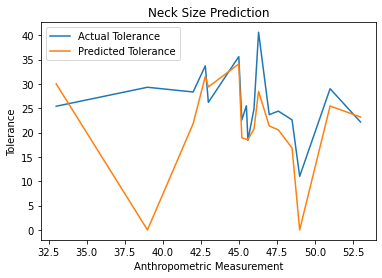

In [193]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("necksize.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon = 0.1 # exploration rate
num_iterations = 40000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Neck Size Prediction')
plt.legend()
plt.show()

# Garment Full Width

## Anthropometric Measurement: Arm Span

Mean Squared Error:  484.0645009382539
     anthropometric_measurement  actual_tolerance  predicted_tolerance
68                        172.0              38.8            42.368421
147                       166.0              27.3             0.000000
96                        162.0              27.0             0.000000
82                        172.0              65.5            42.368421
135                       159.0              52.8            28.473684
139                       149.7              14.7             6.263158
26                        171.5              12.0             0.000000
12                        155.4              15.4            12.315789
18                        178.0              15.3            23.684211
15                        160.1              16.6            10.736842
134                       162.0              22.0             0.000000
128                       165.0              15.7             0.000000
108                       164.6       

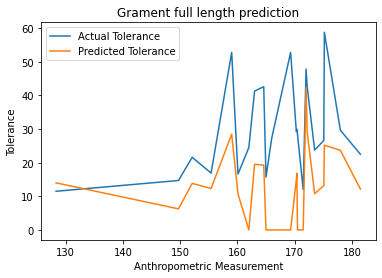

In [192]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("armspan.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.5 # learning rate
gamma = 0.1 # discount factor
epsilon = 0.1# exploration rate
num_iterations = 40000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Grament full length prediction')
plt.legend()
plt.show()


Mean Squared Error:  151.43594889630268
     anthropometric_measurement  actual_tolerance  predicted_tolerance
68                        172.0              38.8            50.181818
147                       166.0              27.3            24.545455
96                        162.0              27.0            14.518552
82                        172.0              65.5            50.181818
135                       159.0              52.8            23.909091
139                       149.7              14.7            10.818182
26                        171.5              12.0            10.454545
12                        155.4              15.4            21.272727
18                        178.0              15.3            55.545455
15                        160.1              16.6            17.181818
134                       162.0              22.0            14.518552
128                       165.0              15.7            20.454545
108                       164.6      

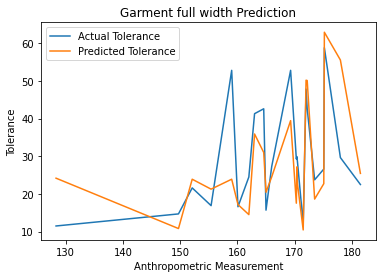

In [182]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("armspan.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon = 0.5 # exploration rate
num_iterations = 40000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Garment full width Prediction')
plt.legend()
plt.show()


# Garment Wrapper length

## Anthropometric Measurement: Waist to floor

Mean Squared Error:  298.3320740740865
     anthropometric_measurement  actual_tolerance  predicted_tolerance
125                       104.9              25.6            23.733333
51                        101.8              22.2            16.133333
139                       110.5              24.7            14.333333
19                         97.0              10.0            24.000000
104                       107.5              18.5            17.866667
12                         98.0              45.0            19.000000
76                        107.6              21.4            14.266667
31                        100.0              44.0             0.000000
81                        103.0              21.5            19.666667
9                          98.5              60.8            25.066667
26                        106.0              11.0            21.600000
96                        106.0              12.0            21.600000
144                       107.0       

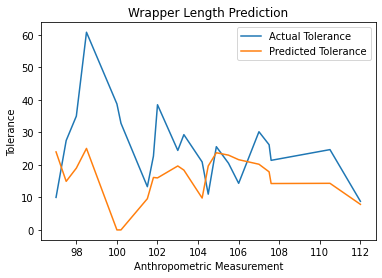

In [177]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("wrapper_length.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.1 # learning rate
gamma = 0.5 # discount factor
epsilon = 0.1 # exploration rate
num_iterations = 40000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Wrapper Length Prediction')
plt.legend()
plt.show()

Mean Squared Error:  167.80088114582378
     anthropometric_measurement  actual_tolerance  predicted_tolerance
125                       104.9              25.6            30.389317
51                        101.8              22.2            11.980991
139                       110.5              24.7            17.545008
19                         97.0              10.0            24.333218
104                       107.5              18.5            13.587275
12                         98.0              45.0            29.452894
76                        107.6              21.4             8.647212
31                        100.0              44.0            29.480017
81                        103.0              21.5            23.526260
9                          98.5              60.8            38.478400
26                        106.0              11.0            32.999989
96                        106.0              12.0            32.999989
144                       107.0      

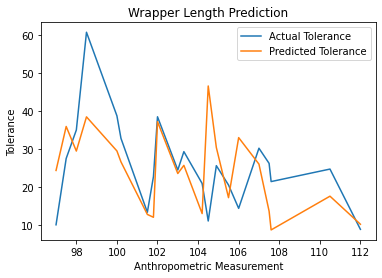

In [170]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("wrapper_length.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon = 0.9 # exploration rate
num_iterations = 10000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Wrapper Length Prediction')
plt.legend()
plt.show()

In [106]:
df = pd.read_csv('wrapper_length.csv')
df.describe()


,anthropometric_measurement,garment_measurement,tolerance
count,152.000000,152.000000,152.000000
mean,103.005263,127.909211,24.903947
std,4.649799,10.081846,10.704730
min,90.500000,101.100000,-4.700000
25%,100.000000,122.000000,18.950000
50%,103.400000,128.000000,24.600000
75%,106.000000,134.000000,32.225000
max,112.000000,159.300000,60.800000


In [44]:
df

,anthropometric_measurement,garment_measurement,tolerance
0,63.5,55.8,7.7
1,55.0,55.4,0.4
2,63.5,63.5,0.0
3,63.5,38.9,24.6
4,62.0,64.0,2.0
...,...,...,...
147,54.5,58.3,3.8
148,65.0,56.0,9.0
149,57.5,51.1,6.4
150,63.0,60.4,2.6


# Garment Sleeve length

## Anthropometric Measurement: Sleeve Length

Mean Squared Error:  54.79666666666667
     anthropometric_measurement  actual_tolerance  predicted_tolerance
68                         61.5              10.0             1.333333
147                        54.5               3.8             0.000000
96                         56.5               1.5            10.333333
82                         64.0              18.2            15.333333
135                        64.9              21.5            16.333333
139                        57.2               3.7             0.933333
26                         65.0               0.0            14.466667
12                         62.0               2.0             6.000000
18                         65.5               3.5             0.000000
15                         56.8               0.3             1.466667
134                        56.5               3.3            10.333333
128                        60.0               7.8             1.333333
108                        64.0       

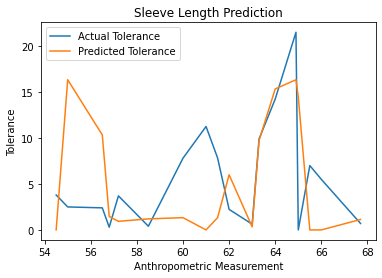

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("sleeve_length.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.9 # learning rate
gamma = 0.5 # discount factor
epsilon = 0.1 # exploration rate
num_iterations = 10000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Sleeve Length Prediction')
plt.legend()
plt.show()

Mean Squared Error:  26.28726948168996
     anthropometric_measurement  actual_tolerance  predicted_tolerance
68                         61.5              10.0             2.894737
147                        54.5               3.8             1.578947
96                         56.5               1.5             1.842105
82                         64.0              18.2            14.947368
135                        64.9              21.5            12.894737
139                        57.2               3.7             0.736842
26                         65.0               0.0             4.736842
12                         62.0               2.0             3.157895
18                         65.5               3.5             2.894225
15                         56.8               0.3             0.754162
134                        56.5               3.3             1.842105
128                        60.0               7.8             0.000000
108                        64.0       

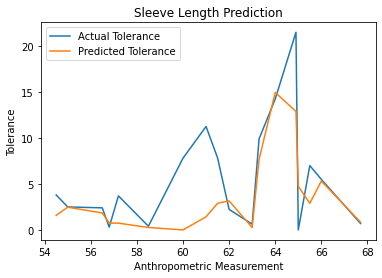

In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("sleeve_length.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.1 # learning rate
gamma = 0.1 # discount factor
epsilon = 0.1 # exploration rate
num_iterations = 20000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Sleeve Length Prediction')
plt.legend()
plt.show()

# Garment Sleeve width

## Anthropometric Measurement: Top Arm

Mean Squared Error:  72.13456451147061
     anthropometric_measurement  actual_tolerance  predicted_tolerance
73                         28.7              52.3            32.866145
18                         27.3              41.7            26.133328
117                        30.5              28.5            28.000000
78                         26.2              19.8            14.666665
76                         38.7              19.7            24.933324
31                         38.0              23.5            11.646015
64                         37.0              17.0            15.333233
140                        34.0              26.0            28.133333
68                         33.4              18.9            21.732665
82                         33.4              42.8            21.732665
109                        28.7              33.6            32.866145
12                         37.0              18.0            15.333233
36                         34.5       

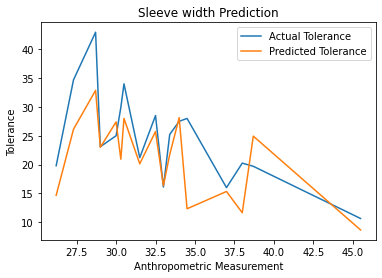

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("sleeve_width.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.1 # learning rate
gamma = 0.5 # discount factor
epsilon = 0.9 # exploration rate
num_iterations = 50000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Sleeve width Prediction')
plt.legend()
plt.show()


Mean Squared Error:  57.67951364974564
     anthropometric_measurement  actual_tolerance  predicted_tolerance
73                         28.7              52.3            44.816778
18                         27.3              41.7            35.635110
117                        30.5              28.5            33.909091
78                         26.2              19.8             9.636317
76                         38.7              19.7            22.545449
31                         38.0              23.5            13.491517
64                         37.0              17.0            20.909091
140                        34.0              26.0            23.363636
68                         33.4              18.9            27.363636
82                         33.4              42.8            27.363636
109                        28.7              33.6            44.816778
12                         37.0              18.0            20.909091
36                         34.5       

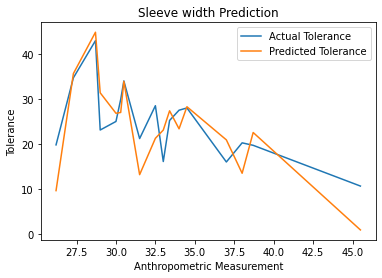

In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("sleeve_width.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon = 0.5 # exploration rate
num_iterations = 10000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Sleeve width Prediction')
plt.legend()
plt.show()


Mean Squared Error:  221.52723806984807
     anthropometric_measurement  actual_tolerance  predicted_tolerance
76                         38.7              19.7            22.545455
18                         27.3              41.7             0.000000
82                         30.0              25.8            27.727273
81                         30.5              26.5            35.909091
143                        33.4              18.9            27.363636
31                         38.0              23.5            13.636364
78                         34.0              32.0            25.363636
64                         37.0              17.0            15.454545
55                         31.5              26.5            16.818182
85                         29.0              18.0            31.363636
45                         33.4              22.6            27.363636
12                         37.0              18.0            15.454545
36                         34.5      

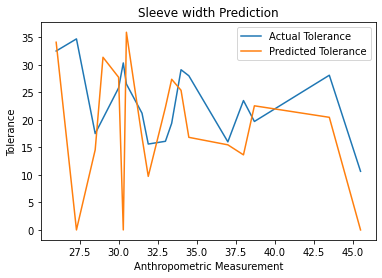

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("sleeve_width.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon = 0.1 # exploration rate
num_iterations = 40000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Sleeve width Prediction')
plt.legend()
plt.show()


# Garment Bust size

## Anthropometric Measurement: Bust

Mean Squared Error:  57.642634552986394
     anthropometric_measurement  actual_tolerance  predicted_tolerance
68                        101.3              18.4            15.595573
147                       110.5              12.4            13.000000
96                         92.4              12.6            10.133333
82                         93.5              23.4            29.200000
135                       101.6              14.0            11.600000
139                        91.4              28.6            20.666667
26                        111.0              14.5            13.533333
12                        103.0              14.0            11.666667
18                         86.8              33.7            21.133333
15                         98.4              25.2            17.066667
134                        92.4              12.3            10.133333
128                        91.0              29.8            27.333333
108                        95.5      

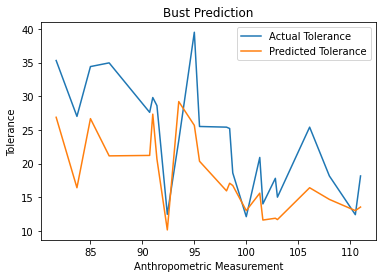

In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("bust.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.5 # learning rate
gamma = 0.5 # discount factor
epsilon = 0.4 # exploration rate
num_iterations = 40000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Bust Prediction')
plt.legend()
plt.show()


Mean Squared Error:  25.73418837371241
R-squared:  0.6409906196984502
     anthropometric_measurement  actual_tolerance  predicted_tolerance
68                        101.3              18.4            20.952201
147                       110.5              12.4            17.653146
96                         92.4              12.6            13.632879
82                         93.5              23.4            39.713717
135                       101.6              14.0            15.801845
139                        91.4              28.6            28.076939
26                        111.0              14.5            18.353475
12                        103.0              14.0            10.188207
18                         86.8              33.7            28.545744
15                         98.4              25.2            21.429902
134                        92.4              12.3            13.632879
128                        91.0              29.8            25.407467
108    

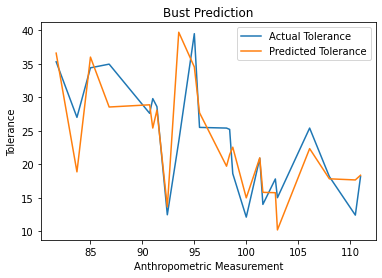

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("bust.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon = 0.9 # exploration rate
num_iterations = 20000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Bust Prediction')
plt.legend()
plt.show()


# Garment Wrapper Width

## Anthropometric Measurement: Hip

Mean Squared Error:  618.3085023239481
     anthropometric_measurement  actual_tolerance  predicted_tolerance
117                        96.5              72.2             0.000000
19                         90.6             107.8            93.232720
82                         97.0             106.0           119.233691
97                        103.2             105.0            78.621468
56                         92.5             107.0            84.425772
12                        104.0              85.0            84.389461
132                       109.0             105.1            95.276302
65                        103.5              96.5            69.872699
66                        112.4             106.1            90.044425
18                        120.8              72.8            74.733648
51                         99.5             111.5            94.861013
78                        112.3              92.7            64.460162
94                         99.7       

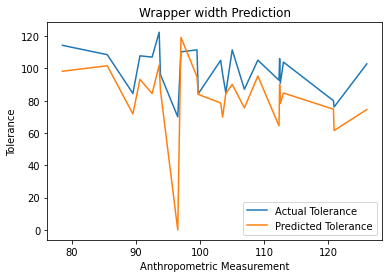

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("wrapper_width.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon = 0.9 # exploration rate
num_iterations = 10000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Wrapper width Prediction')
plt.legend()
plt.show()


Mean Squared Error:  125.88330151760768
     anthropometric_measurement  actual_tolerance  predicted_tolerance
117                        96.5              72.2            66.818182
19                         90.6             107.8            95.818182
82                         97.0             106.0           121.999984
97                        103.2             105.0            93.818182
56                         92.5             107.0            86.818182
12                        104.0              85.0            88.181818
132                       109.0             105.1            98.636364
65                        103.5              96.5            85.454545
66                        112.4             106.1            94.090909
18                        120.8              72.8            75.818182
51                         99.5             111.5            98.636364
78                        112.3              92.7            89.454545
94                         99.7      

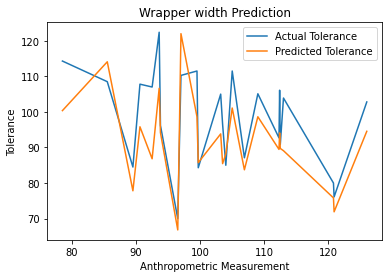

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("wrapper_width.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon = 0.5 # exploration rate
num_iterations = 40000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Wrapper width Prediction')
plt.legend()
plt.show()


# Garment Top Length

## Anthropometric Measurement: Front Shoulder to waist

Mean Squared Error:  52.818627590566194
     anthropometric_measurement  actual_tolerance  predicted_tolerance
68                         52.0              17.0            11.327009
147                        53.5              11.2             6.549637
96                         44.7              21.3            16.139787
82                         45.5              15.5            13.133242
135                        50.4              16.7             9.131205
139                        43.1              24.5            11.029592
26                         49.0              18.3            11.391329
12                         53.0               9.5             7.182797
18                         47.0              36.0            13.326949
15                         50.0              10.0            11.998425
134                        44.7              23.3            16.139787
128                        46.5              16.5            11.213635
108                        47.0      

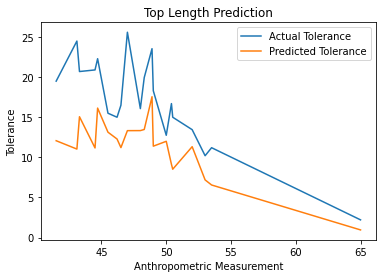

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("top_length.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.1 # learning rate
gamma = 0.5 # discount factor
epsilon = 0.9 # exploration rate
num_iterations = 10000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Top Length Prediction')
plt.legend()
plt.show()


Mean Squared Error:  48.608781458790524
R-squared:  -0.24614427288164475
     anthropometric_measurement  actual_tolerance  predicted_tolerance
68                         52.0              17.0            13.333333
147                        53.5              11.2             7.666667
96                         44.7              21.3            16.533306
82                         45.5              15.5            13.133333
135                        50.4              16.7            11.000000
139                        43.1              24.5            15.933333
26                         49.0              18.3            11.612978
12                         53.0               9.5             7.666592
18                         47.0              36.0            13.333333
15                         50.0              10.0            11.999965
134                        44.7              23.3            16.533306
128                        46.5              16.5            11.333333
108 

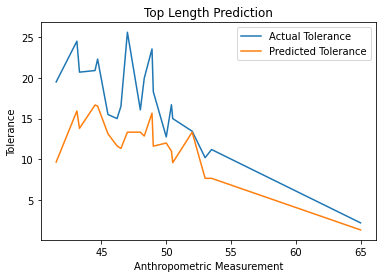

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("top_length.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.1 # learning rate
gamma = 0.5 # discount factor
epsilon = 0.9 # exploration rate
num_iterations = 40000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)

# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Top Length Prediction')
plt.legend()
plt.show()


Mean Squared Error:  23.94969345514758
     anthropometric_measurement  actual_tolerance  predicted_tolerance
68                         52.0              17.0            18.181818
147                        53.5              11.2             6.727273
96                         44.7              21.3            22.545455
82                         45.5              15.5            16.363636
135                        50.4              16.7            14.900032
139                        43.1              24.5            21.727273
26                         49.0              18.3            15.454545
12                         53.0               9.5            10.231098
18                         47.0              36.0            16.636364
15                         50.0              10.0            11.818182
134                        44.7              23.3            22.545455
128                        46.5              16.5            15.454545
108                        47.0       

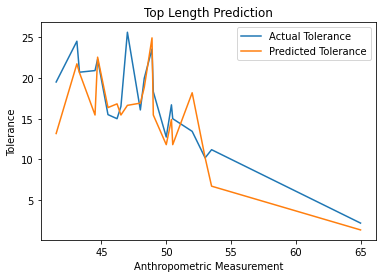

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data from the csv file into a dataframe
df = pd.read_csv("top_length.csv")

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df[['anthropometric_measurement', 'garment_measurement']], df['tolerance'], test_size=0.2, random_state=42)

# Define the state space and action space for the MDP
state_space = np.array(df['anthropometric_measurement'].unique())
action_space = np.array(df['garment_measurement'].unique())

# Initialize the Q-Table
q_table = pd.DataFrame(0.0, index=state_space, columns=action_space)

# Define the hyperparameters for the Q-Learning algorithm
alpha = 0.1 # learning rate
gamma = 0.9 # discount factor
epsilon = 0.1 # exploration rate
num_iterations = 40000 # number of iterations to train the Q-Learning algorithm

for i in range(num_iterations):
    state = X_train['anthropometric_measurement'].sample(1).iloc[0] # select a random state from the training data
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(action_space) # select a random action from the action space
    else:
        action = q_table.loc[state, :].idxmax() # select the action with the highest Q-Value for the current state
    
    tolerance = y_train[(X_train['anthropometric_measurement'] == state) & (X_train['garment_measurement'] == action)].values
    
    if len(tolerance) == 0:
        continue
    else:
        reward = np.abs(tolerance[0] - q_table.loc[state, action]) # calculate the reward based on the difference between the actual tolerance and the predicted tolerance
        q_table.loc[state, action] += alpha * (reward + gamma * q_table.loc[state, :].max() - q_table.loc[state, action]) # update the Q-Table with the new value

# Use the Q-Table to make predictions on the test data
y_pred = []
for i in X_test.index:
    state = X_test.loc[i, 'anthropometric_measurement']
    action = q_table.loc[state, :].idxmax()
    y_pred.append(q_table.loc[state, action])

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)


# Store the actual and predicted tolerance values in a dataframe
result = pd.DataFrame({'anthropometric_measurement': X_test['anthropometric_measurement'], 'actual_tolerance': y_test, 'predicted_tolerance': y_pred})

# Print the evaluation metrics
print("Mean Squared Error: ", mse)


# Print Result
print(result)

# Plot the line graph
result = result.groupby('anthropometric_measurement', as_index=False).mean()
plt.plot(result['anthropometric_measurement'], result['actual_tolerance'], label='Actual Tolerance')
plt.plot(result['anthropometric_measurement'], result['predicted_tolerance'], label='Predicted Tolerance')
plt.xlabel('Anthropometric Measurement')
plt.ylabel('Tolerance')
plt.title('Top Length Prediction')
plt.legend()
plt.show()


In [47]:
df = pd.read_csv('sleeve_length.csv')
df.describe()

,anthropometric_measurement,garment_measurement,tolerance
count,152.000000,152.000000,152.000000
mean,61.315789,56.480921,7.009868
std,3.418030,7.938478,6.870406
min,54.500000,30.500000,0.000000
25%,58.500000,53.300000,1.800000
50%,62.000000,57.800000,4.750000
75%,64.000000,61.125000,9.525000
max,67.700000,76.400000,28.400000


In [49]:
df = pd.read_csv('wrapper_length.csv')
df.describe()

,anthropometric_measurement,garment_measurement,tolerance,Unnamed: 3
count,152.000000,152.000000,152.000000,0.0
mean,103.005263,127.909211,24.903947,NaN
std,4.649799,10.081846,10.704730,NaN
min,90.500000,101.100000,-4.700000,NaN
25%,100.000000,122.000000,18.950000,NaN
50%,103.400000,128.000000,24.600000,NaN
75%,106.000000,134.000000,32.225000,NaN
max,112.000000,159.300000,60.800000,NaN


In [51]:
df = pd.read_csv('wrapper_width.csv')
df.describe()

,anthropometric_measurement,garment_measurement,tolerance
count,152.000000,152.000000,152.000000
mean,105.063158,201.311842,96.248684
std,11.080283,14.462072,14.436859
min,78.500000,163.400000,54.500000
25%,97.000000,193.600000,86.000000
50%,104.500000,200.000000,96.300000
75%,112.500000,212.000000,105.425000
max,130.000000,238.800000,135.800000


In [52]:
df = pd.read_csv('armspan.csv')
df.describe()

,anthropometric_measurement,garment_measurement,tolerance
count,152.000000,152.000000,152.000000
mean,166.652632,132.916447,33.736184
std,9.867808,17.263365,17.200761
min,128.300000,85.900000,3.900000
25%,162.000000,124.175000,21.225000
50%,169.400000,135.000000,29.900000
75%,172.500000,142.225000,42.600000
max,181.500000,172.100000,83.600000


In [ ]:
df = pd.read_csv('_width.csv')
df.describe()

In [53]:
df = pd.read_csv('top_length.csv')
df.describe()

,anthropometric_measurement,garment_measurement,tolerance
count,152.000000,152.000000,152.000000
mean,48.213158,64.734211,16.521053
std,4.022070,3.702766,4.894444
min,41.500000,54.900000,0.700000
25%,45.500000,62.500000,13.875000
50%,48.000000,64.700000,17.000000
75%,50.400000,66.525000,19.525000
max,65.000000,83.000000,36.000000


In [54]:
df = pd.read_csv('bust.csv')
df.describe()

,anthropometric_measurement,garment_measurement,tolerance
count,152.000000,152.000000,152.000000
mean,97.650000,120.113158,22.463158
std,9.337293,7.833708,9.057935
min,81.600000,90.100000,1.100000
25%,91.000000,116.975000,16.000000
50%,96.900000,120.550000,21.700000
75%,103.000000,124.500000,27.450000
max,120.900000,139.000000,44.900000


In [56]:
df = pd.read_csv('necksize.csv')
df.describe()

,anthropometric_measurement,garment_measurement,tolerance
count,152.000000,152.000000,152.000000
mean,45.618421,72.517105,26.898684
std,4.111290,7.648389,7.220620
min,33.000000,54.600000,9.000000
25%,43.000000,67.225000,22.575000
50%,46.000000,71.400000,26.150000
75%,48.000000,77.500000,31.625000
max,53.000000,102.800000,59.300000


In [57]:
df = pd.read_csv('sleeve_width.csv')
df.describe()

,anthropometric_measurement,garment_measurement,tolerance
count,151.000000,151.000000,151.000000
mean,32.544371,58.394040,25.849669
std,4.425933,8.066029,8.787657
min,26.000000,35.000000,1.000000
25%,29.000000,53.300000,18.950000
50%,31.500000,59.500000,26.500000
75%,34.000000,63.000000,31.050000
max,45.500000,81.000000,52.300000


In [58]:
df = pd.read_csv('wrapper_length.csv')
df.describe()

,anthropometric_measurement,garment_measurement,tolerance
count,152.000000,152.000000,152.000000
mean,103.005263,127.909211,24.903947
std,4.649799,10.081846,10.704730
min,90.500000,101.100000,-4.700000
25%,100.000000,122.000000,18.950000
50%,103.400000,128.000000,24.600000
75%,106.000000,134.000000,32.225000
max,112.000000,159.300000,60.800000
